## Observations and Insights

## Dependencies and starter code

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_metadata.head()
results_combo = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

## Summary statistics

In [83]:
results_combo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [107]:
Drug = results_combo["Drug Regimen"].unique()
Drug

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [187]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#results_combo_stats = results_combo.groupby("Drug Regimen").describe()
tumor = results_combo.set_index('Drug Regimen')['Tumor Volume (mm3)']
tumor_stats = tumor.groupby("Drug Regimen").describe()
#tumor_stats


#Var of Tumor
tumor_var = tumor.groupby("Drug Regimen").var()

#StD of Tumor
tumor_sem = tumor.groupby("Drug Regimen").sem()




tumor_stats


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [199]:
#tumor_stats.get_group("Capomulin") 
tumor_status2 = pd.concat([tumor_stats, tumor_var.rename('variance'),tumor_sem.rename('SEM')], axis=1)
#, columns = ['count','mean','std','min','25%', 'median','75%','max','variance','SEM']

tumor_status3 = tumor_status2.drop(columns=['count','min','25%','75%','max'])
tumor_status4 = tumor_status3.rename(columns = {"50%":"median"})
tumor_status4

,mean,std,median,variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,41.557809,24.947764,0.329346
Ceftamin,52.591172,6.268188,51.776157,39.290177,0.469821
Infubinol,52.884795,6.567243,51.820584,43.128684,0.492236
Ketapril,55.235638,8.279709,53.698743,68.553577,0.603860
Naftisol,54.331565,8.134708,52.509285,66.173479,0.596466
Placebo,54.033581,7.821003,52.288934,61.168083,0.581331
Propriva,52.322552,6.507770,50.854632,42.351070,0.512884
Ramicane,40.216745,4.846308,40.673236,23.486704,0.320955
Stelasyn,54.233149,7.710419,52.431737,59.450562,0.573111


Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Bar plots

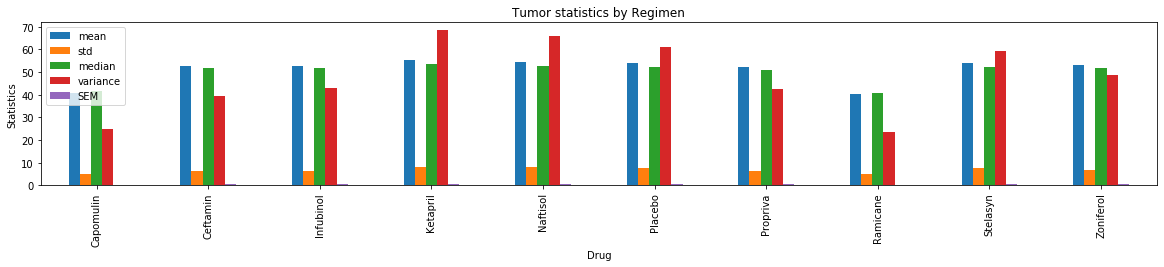

In [205]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
tumor_status4.plot(kind="bar", figsize=(20,3))

#tumor_status4.set_xticklabels(tumor_status4)

plt.title("Tumor statistics by Regimen")
plt.xlabel("Drug")
plt.ylabel("Statistics")


plt.show()

Text(0, 0.5, 'Statistics')

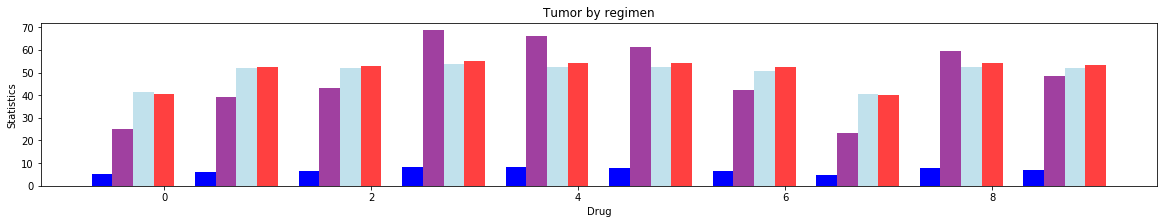

In [217]:
x_axis = np.arange(len(Drug))
stats = [value for value in x_axis]

width = 0.2

plt.figure(figsize=(20,3))
plt.bar(x_axis, tumor_stats["mean"], width, color='r', alpha=0.75, align="center")
plt.bar(x_axis - width, tumor_stats["50%"], width, color='lightblue', alpha=0.75, align="center")
#plt.bar(x_axis - (width + width), tumor_sem, width, color='violet', alpha=0.75, align="center")
plt.bar(x_axis - (width *2), tumor_var, width, color='purple', alpha=0.75, align="center")
plt.bar(x_axis - (width* 3), tumor_stats["std"], width, color='blue', alpha=1, align="center")


#Labels
plt.title("Tumor by regimen")
plt.xlabel("Drug")
plt.ylabel("Statistics")
#plt.xticks(ind + width / 4, ('Capomulin', 'Ceftamin', 'Infubinol','Capomulin', 'Ceftamin', 'Infubinol''Capomulin', 'Ceftamin', 'Infubinol', 'Infubinol')

#plt.xticks(Drug)
#ax.set_xticklabels( ('Capomulin', 'G2', 'G3', 'G4', 'G5') )

Text(0, 0.5, 'Statistics')

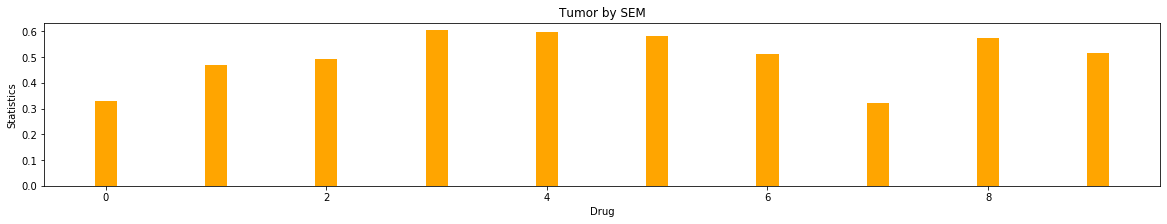

In [220]:
x_axis = np.arange(len(Drug))
stats = [value for value in x_axis]

width = 0.2

plt.figure(figsize=(20,3))
plt.bar(x_axis, tumor_sem, width, color='orange', alpha=1, align="center")

#Labels
plt.title("Tumor by SEM")
plt.xlabel("Drug")
plt.ylabel("Statistics")
#plt.xticks(Drug)
#ax.set_xticklabels( ('Capomulin', 'G2', 'G3', 'G4', 'G5') )

In [204]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


## Pie plots

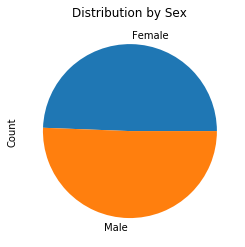

In [215]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = results_combo.set_index('Sex')['Mouse ID']
gender_groups = mice_sex.groupby('Sex').count()
gender_groups.head()

gender_groups.plot(kind="pie")

plt.title("Distribution by Sex")
#plt.xlabel("Count")
plt.ylabel("Count")


plt.show()

KeyError: 'Sex'

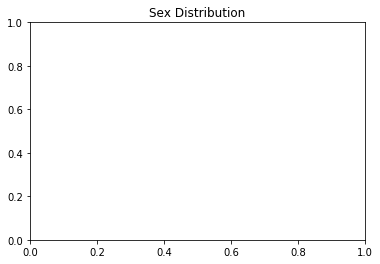

In [170]:
colors = ["yellowgreen","lightskyblue"]
plt.title("Sex Distribution")

plt.pie(gender_groups, labels=mice_sex['Sex'], colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plot.show()

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen